# Análise Exploratoria de Dados do ENEM 2019

## Objetivo

A partir dos dados do Enem 2019, o objetivo do projeto é fazer a análise exploratória de dados utilizando como objeto de estudo a nota dos candidatos.
Em especial o empenho em entender e tratar dos dados para melhorar nossa eficiencia na análise e extrair insights mais precisos do dataset.


A análise é fundamentada em teorias sociológicas, especialmente nas contribuições de Pierre Bourdieu, que destacam a importância do capital cultural e econômico na trajetória educacional dos indivíduos. Bourdieu argumenta que as classes sociais possuem diferentes capitais culturais, que moldam suas expectativas e escolhas educacionais. Nesse sentido através das notas obtidas podemos identificar como o capital cultural, representado pelo nível de educação dos pais e acesso a recursos educacionais, podem impacta o desempenho dos alunos no ENEM.

Desse modo analisaremos
Correlação com Indicadores Sociais:

- Analisar como indicadores sociais, como renda, escolaridade dos pais e tipo de escola se correlacionam com as notas obtidas.
- Identificar possíveis disparidades entre grupos sociais.

Ao final da análise, espera-se:

- Identificar padrões que confirmem ou refutem as proposições da teoria de Bourdieu.
- Entender como o capital cultural e econômico se relaciona com o desempenho no ENEM.
- Oferecer insights para promover maior equidade no sistema educacional brasileiro.

## Ênfase

Além do problema a ser respondido na análise, esse é um dataset onde será bastante explorado o **pré-processamento** dos dados visando aprimorar a habildiade de se aprofundar e entender o dataset e seus problemas para assim extrair insights mais precisos.

## Dados

Dados Disponibilizados em https://download.inep.gov.br/microdados/microdados_enem_2019.zip

- Porque foi escolhido os dados do enem 2019 e não os mais atuais?
  - O dataset de 2019 foi o unico ano em que foi disponibilizado os dados da escola dos incritos. Sendo esse um dado muito importante para nossa investigação

## Dicionário de dados

Notas

| Coluna     | Descrição                             |
|------------|---------------------------------------|
| NU_NOTA_CN | Nota da prova de Ciências da Natureza |
| NU_NOTA_CH | Nota da prova de Ciências Humanas     |
| NU_NOTA_LC | Nota da prova de Linguagens e Códigos |
| NU_NOTA_MT | Nota da prova de Matemática           |




## Imports


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Desativar todos os warnings
warnings.filterwarnings("ignore")
#Configuração pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)

#Configuração pandas para nao mostrar notação cientifica para numeros
pd.set_option ('display.float_format', lambda x: '%.2f' % x)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


O arquivo a ser importado é muito grande (2,5 GB) e está excedendo a Memoria RAM Disponibilizada pelo Google Colab. Para resolvermos esse problema iremos particionar a extração dos dados afim de aliviar o processamento e por fim concatenar todos os dados em um unico df

In [ ]:
%%time
caminho_arquivo = '/content/drive/MyDrive/dados/MICRODADOS_ENEM_2019.csv'

tamanho_bloco = 10000
lista_dataframes = []

total_linhas = 0

# Lendo o arquivo em blocos e armazenando os df na lista
for bloco in pd.read_csv(caminho_arquivo, sep=';', encoding='iso-8859-1', chunksize=tamanho_bloco):
    lista_dataframes.append(bloco)
    total_linhas += bloco.shape[0]



CPU times: user 1min 1s, sys: 10.1 s, total: 1min 12s
Wall time: 1min 20s


In [ ]:
# Concatenando os df parcelados acima
df = pd.concat(lista_dataframes, ignore_index=True)


In [ ]:
# %%time
# df = pd.read_csv('/content/drive/MyDrive/dados/MICRODADOS_ENEM_2019.csv',
#                    sep=';', encoding='iso-8859-1')

In [ ]:
df.shape

(5095171, 76)

In [ ]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,13,M,1,3,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552205,Sorocaba,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,8,M,1,1,1,1,5,1,1.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,13,F,1,3,1,1,13,1,1.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2304400,Fortaleza,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,10,F,1,1,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1721000,Palmas,17,TO,1,1,1,1,504.00,510.00,513.00,516.00,483.80,503.60,537.30,392.00,BACCEEBEECDBEDDAEECDEDEADEBBCDBCAACADEEACCBBD,AECEDADAABAADBAADAEBACBAECCDAEADCDBBECCEDABCD,99999AAABEBBCCBDCAEECADBACAADAECCCDCCBAEBDEEEA...,DDBBBBCDCCDCAECCBBECDAEBADCD..CABCCECAEBDBBDA,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,7,F,1,1,1,1,4,1,1.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3118601,Contagem,31,MG,1,1,1,1,504.00,510.00,513.00,516.00,513.60,575.50,570.70,677.00,EEBEDEEEEEBDCEEBEEEEABEEBEEBAEDEECECCDBCECEAE,EEDCCEDDBCBEABAAABADCEDABDBBCBDCCCCDAEDEDBDCB,ABBBE99999ABBCACCCAEEEDCCDADCCAEDEDDEEDBBDECBD...,CDEEEEEAEECBABABCDCACEEEEEEDEEACEAEDEBEEECEDE,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B


Deletando a lista de dataframes para liberar uso de memória do nosso jupyter notebook

In [ ]:
del lista_dataframes

# Coletando lixo para liberar memória não utilizada
import gc
gc.collect()

0

## Pré-processamento

O dicionario dos dados estão disponiveis no arquivo 'Dicionário_Microdados_Enem_2019.xlsx'

### Drop
Vamos deletar algumas colunas que não serão úteis em nossa análise, sendo esses:
- Colunas com inicio TX_ (descrevem a resposta do aluno e o gabarito da prova)
- Colunas com inicio CO_ (códigos para algumas informações como escola, prova, municipio)
- Numero de inscrição e ano de realização da prova, uma vez que só será analisado o ano de 2019
- Algumas outras colunas que não serão uteis em nossa análise.

In [ ]:
# Selecionando colunas que começam com tx

coluna_questoes = [coluna for coluna in df.columns if coluna.startswith('TX_')]
coluna_questoes

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [ ]:
# Selecionando colunas que começam com co
coluna_codigos = [coluna for coluna in df.columns if coluna.startswith('CO_')]
coluna_codigos

['CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [ ]:
# Selecionando colunas com info de municipio
coluna_municipios = [coluna for coluna in df.columns if 'MUNICIPIO' in coluna]
coluna_municipios

['CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

Em um projeto mais sério e complexo, seria criado dataframes backup de cada alteração, mas afim de aliviar o uso de memoria e melhorar o processamento do código, será copiado no mesmo dataframe

In [ ]:
# Removendo colunas do dataframe
colunas_remover = coluna_questoes+coluna_codigos+coluna_municipios+['NU_INSCRICAO', 'NU_ANO', 'TP_DEPENDENCIA_ADM_ESC',
                                                                    'TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC', 'SG_UF_ESC']
df = df.drop(colunas_remover, axis=1)
df.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,13,M,1,3,1,1,11,1,NaN,0,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,8,M,1,1,1,1,5,1,1.00,0,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,13,F,1,3,1,1,13,1,1.00,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,10,F,1,1,1,1,4,1,NaN,0,TO,1,1,1,1,483.80,503.60,537.30,392.00,1,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,7,F,1,1,1,1,4,1,1.00,0,MG,1,1,1,1,513.60,575.50,570.70,677.00,0,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B


In [ ]:
df.shape

(5095171, 52)

In [ ]:
# Deletando as colunas de questionarios que não pretendemos usar
col_questionario = []
for i in range(7,10):
    col_questionario.append(f'Q00{i}')
for i in range(10,26):
    col_questionario.append(f'Q0{i}')

df = df.drop(columns=col_questionario, axis=1)

In [ ]:
df.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006
0,13,M,1,3,1,1,11,1,NaN,0,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A
1,8,M,1,1,1,1,5,1,1.00,0,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C
2,13,F,1,3,1,1,13,1,1.00,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B
3,10,F,1,1,1,1,4,1,NaN,0,TO,1,1,1,1,483.80,503.60,537.30,392.00,1,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E
4,7,F,1,1,1,1,4,1,1.00,0,MG,1,1,1,1,513.60,575.50,570.70,677.00,0,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G


In [ ]:
# Verificando valores nulos
df.isnull().sum()

TP_FAIXA_ETARIA            0
TP_SEXO                    0
TP_ESTADO_CIVIL            0
TP_COR_RACA                0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
TP_ANO_CONCLUIU            0
TP_ESCOLA                  0
TP_ENSINO            2217036
IN_TREINEIRO               0
SG_UF_PROVA                0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NU_NOTA_CN           1384836
NU_NOTA_CH           1172125
NU_NOTA_LC           1172125
NU_NOTA_MT           1384836
TP_LINGUA                  0
TP_STATUS_REDACAO    1172126
NU_NOTA_COMP1        1172126
NU_NOTA_COMP2        1172126
NU_NOTA_COMP3        1172126
NU_NOTA_COMP4        1172126
NU_NOTA_COMP5        1172126
NU_NOTA_REDACAO      1172126
Q001                       0
Q002                       0
Q003                       0
Q004                       0
Q005                       0
Q006                       0
dtype: int64

### Entendendo os valores ausentes

Boa parte desses valores ausentes são consequência de falta na realização da prova. Para isso vamos os dados que faltaram no dia da prova e excluir do nosso dataframe.

A coluna que identifica aqueles que faltaram é a coluna TP_PRESENSA* em 3 valores:
- 1: Presença
- 0: Ausencia
- 2: Desclassificados

As notas de CN e MT (Ciências Naturais e Matemática) tem mais valores ausentes por ocorrer no segundo dia de prova, isto significa que boa parte dos alunos que faltaram no primeiro dia, faltaram também no segundo. E também ocorre um aumento por que alguns que sentiram que foram mal na primeira prova, podem acabar desistindo para a segunda prova.


In [ ]:
gc.collect()

0

In [ ]:
# Localizando os dados onde os inscritos estavam presente na prova (excluido aqueles que faltaram e foram eliminados)

# Foi escolhido apenas uma prova de cada dia, visto que a falta em uma automaticamente justifica a falta em outra prova (quando ambas ocorridas no mesmo dia)

df = df.loc[df.TP_PRESENCA_CH == 1]
df = df.loc[df.TP_PRESENCA_MT == 1]

In [ ]:
df.isnull().sum()

TP_FAIXA_ETARIA            0
TP_SEXO                    0
TP_ESTADO_CIVIL            0
TP_COR_RACA                0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
TP_ANO_CONCLUIU            0
TP_ESCOLA                  0
TP_ENSINO            1054132
IN_TREINEIRO               0
SG_UF_PROVA                0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NU_NOTA_CN                 0
NU_NOTA_CH                 0
NU_NOTA_LC                 0
NU_NOTA_MT                 0
TP_LINGUA                  0
TP_STATUS_REDACAO          1
NU_NOTA_COMP1              1
NU_NOTA_COMP2              1
NU_NOTA_COMP3              1
NU_NOTA_COMP4              1
NU_NOTA_COMP5              1
NU_NOTA_REDACAO            1
Q001                       0
Q002                       0
Q003                       0
Q004                       0
Q005                       0
Q006                       0
dtype: int64

In [ ]:
df.shape

(3701910, 33)

### Treineiros

Para avaliar os individuos que realizaram a prova, é interessante considerar aqueles que se dedicaram e se empenharam a realizar a prova quando esta valia de fato. Muitos realizam a prova como treineiro apenas para conhecer e ter ideia de como funciona (uma vez que a realização da prova como treineiro não permite o uso para entrada em cursos superiores)

Portanto vamos remover alunos treineiros para não interferir em nossa análise

In [ ]:
# Contagem dos treineiros
df.query('IN_TREINEIRO == 1')['IN_TREINEIRO'].value_counts()

1    527698
Name: IN_TREINEIRO, dtype: int64

In [ ]:
# Dados onde os treineiros são negativos -> não são treineiros
df = df.loc[df.IN_TREINEIRO == 0]

Vamos eliminar as colunas de presença

In [ ]:
# Drop das colunas de presença
df = df.drop(['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT', 'IN_TREINEIRO'], axis=1)
df.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006
3,10,F,1,1,1,1,4,1,NaN,TO,483.80,503.60,537.30,392.00,1,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E
4,7,F,1,1,1,1,4,1,1.00,MG,513.60,575.50,570.70,677.00,0,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G
5,13,M,2,2,1,1,13,1,NaN,MT,563.70,644.90,564.20,675.30,0,1.00,160.00,200.00,180.00,180.00,80.00,800.00,B,B,C,B,7,E
6,7,F,1,3,1,1,5,1,1.00,BA,484.60,488.40,507.20,594.70,1,1.00,140.00,120.00,120.00,160.00,60.00,600.00,E,B,C,B,3,B
9,2,M,1,1,1,2,0,2,1.00,SP,543.90,548.10,502.50,480.70,0,1.00,120.00,40.00,120.00,120.00,0.00,400.00,E,E,B,B,5,F


### Engenharia de Atributos

In [ ]:
# Renomenado as colunas
rename = {
    'TP_FAIXA_ETARIA': 'faixa_etaria',
    'TP_SEXO': 'sexo',
    'TP_ESTADO_CIVIL': 'estado_civil',
    'TP_COR_RACA': 'raca',
    'TP_NACIONALIDADE': 'nacionalidade',
    'TP_ST_CONCLUSAO': 'status_em',
    'TP_ANO_CONCLUIU': 'anos_conclusao_em',
    'TP_ESCOLA': 'tipo_escolaridade',
    'TP_ENSINO': 'tipo_ensino',
    'SG_UF_PROVA': 'estado',
    'NU_NOTA_CN': 'nota_cn',
    'NU_NOTA_CH': 'nota_ch',
    'NU_NOTA_LC': 'nota_lc',
    'NU_NOTA_MT': 'nota_mt',
    'TP_LINGUA': 'lingua_estrangeira',
    'TP_STATUS_REDACAO': 'status_redacao',
    'NU_NOTA_COMP1': 'competencia1',
    'NU_NOTA_COMP2': 'competencia2',
    'NU_NOTA_COMP3': 'competencia3',
    'NU_NOTA_COMP4': 'competencia4',
    'NU_NOTA_COMP5': 'competencia5',
    'NU_NOTA_REDACAO': 'nota_redacao',
    'Q001': 'formacao_pai',
    'Q002': 'formacao_mae',
    'Q003': 'emprego_pai',
    'Q004': 'emprego_mae',
    'Q005': 'moradores_residencia',
    'Q006': 'renda_mensal_familiar',
}

df = df.rename(columns=rename)

In [ ]:
# selecionando as colunas de nota
colunas_notas = [coluna for coluna in df.columns if 'nota' in coluna]
colunas_notas

['nota_cn', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao']

In [ ]:
df['nota_media'] = df[colunas_notas].mean(axis=1)

In [ ]:
colunas_notas = [coluna for coluna in df.columns if 'nota' in coluna]

- Nem sempre só os valores nulos indicam valores ausentes. Após calcular a média das notas, vamos verificar quantos dados ainda contem a nota 0 (o que indica valor ausente) e eliminar esses dados

In [ ]:
(df['nota_media'] == 0).sum()

26

In [ ]:
df = df[df['nota_media'] != 0].copy()

In [ ]:
df.head()

,faixa_etaria,sexo,estado_civil,raca,nacionalidade,status_em,anos_conclusao_em,tipo_escolaridade,tipo_ensino,estado,nota_cn,nota_ch,nota_lc,nota_mt,lingua_estrangeira,status_redacao,competencia1,competencia2,competencia3,competencia4,competencia5,nota_redacao,formacao_pai,formacao_mae,emprego_pai,emprego_mae,moradores_residencia,renda_mensal_familiar,superior_pais,25mais,25_anos,nota_media
3,25 anos,F,1,branca,1,1,4,nao respondeu,NaN,TO,483.80,503.60,537.30,392.00,espanhol,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,0,S,N,475.34
4,22 anos,F,1,branca,1,1,4,nao respondeu,1.00,MG,513.60,575.50,570.70,677.00,ingles,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G,0,N,N,639.36
5,Entre 36 e 40 anos,M,2,preta,1,1,13,nao respondeu,NaN,MT,563.70,644.90,564.20,675.30,ingles,1.00,160.00,200.00,180.00,180.00,80.00,800.00,B,B,C,B,7,E,0,S,S,649.62
6,22 anos,F,1,parda,1,1,5,nao respondeu,1.00,BA,484.60,488.40,507.20,594.70,espanhol,1.00,140.00,120.00,120.00,160.00,60.00,600.00,E,B,C,B,3,B,0,N,N,534.98
9,17 anos,M,1,branca,1,2,0,publica,1.00,SP,543.90,548.10,502.50,480.70,ingles,1.00,120.00,40.00,120.00,120.00,0.00,400.00,E,E,B,B,5,F,0,N,N,495.04


In [ ]:
# Decodificando algumas variaveis
df["tipo_escolaridade"] = df["tipo_escolaridade"].replace({1:"nao respondeu", 2:"publica", 3:"privada", 4:"exterior"})
df["lingua_estrangeira"] = df["lingua_estrangeira"].replace({0:"ingles", 1:"espanhol"})
df["raca"] = df["raca"].replace({0:"nao_declarado", 1:"branca", 2:"preta", 3:"parda", 4:"amarela", 5:"indigena"})
df["faixa_etaria2"] = df["faixa_etaria"].replace({
    1: "Menor de 17 anos",
    2: "17 anos",
    3: "18 anos",
    4: "19 anos",
    5: "20 anos",
    6: "21 anos",
    7: "22 anos",
    8: "23 anos",
    9: "24 anos",
    10: "25 anos",
    11: "Entre 26 e 30 anos",
    12: "Entre 31 e 35 anos",
    13: "Entre 36 e 40 anos",
    14: "Entre 41 e 45 anos",
    15: "Entre 46 e 50 anos",
    16: "Entre 51 e 55 anos",
    17: "Entre 56 e 60 anos",
    18: "Entre 61 e 65 anos",
    19: "Entre 66 e 70 anos",
    20: "Maior de 70 anos"
})

- Optarei por manter a coluna 'faixa_etaria' numérica por quê pode vim a ser utilizada em um gráfico de correlação futuramente.
- O mesmo será feito com a coluna 'renda_mensal_familiar' que será transformada em numeros sequenciais de 1 a 17.

In [ ]:
df.tipo_escolaridade.value_counts()

nao respondeu    1957070
publica          1009819
privada           207297
Name: tipo_escolaridade, dtype: int64

In [ ]:
df.dtypes

faixa_etaria               int64
sexo                      object
estado_civil               int64
raca                      object
nacionalidade              int64
status_em                  int64
anos_conclusao_em          int64
tipo_escolaridade         object
tipo_ensino              float64
estado                    object
nota_cn                  float64
nota_ch                  float64
nota_lc                  float64
nota_mt                  float64
lingua_estrangeira        object
status_redacao           float64
competencia1             float64
competencia2             float64
competencia3             float64
competencia4             float64
competencia5             float64
nota_redacao             float64
formacao_pai              object
formacao_mae              object
emprego_pai               object
emprego_mae               object
moradores_residencia       int64
renda_mensal_familiar      int64
nota_media               float64
faixa_etaria2             object
superior_p

In [ ]:
# Criando uma função que vai iterar os dados contidos em renda_mensal_familiar (letras do alfabeto) e transformar em número

from string import ascii_uppercase
dicionario_renda = dict()


for i, letra in enumerate(ascii_uppercase):
    if i==17:
        break
    dicionario_renda[letra]=i

df['renda_mensal_familiar'] = df['renda_mensal_familiar'].map(dicionario_renda)

df.head()

,faixa_etaria,sexo,estado_civil,raca,nacionalidade,status_em,anos_conclusao_em,tipo_escolaridade,tipo_ensino,estado,nota_cn,nota_ch,nota_lc,nota_mt,lingua_estrangeira,status_redacao,competencia1,competencia2,competencia3,competencia4,competencia5,nota_redacao,formacao_pai,formacao_mae,emprego_pai,emprego_mae,moradores_residencia,renda_mensal_familiar,nota_media,faixa_etaria2
3,10,F,1,branca,1,1,4,nao respondeu,NaN,TO,483.80,503.60,537.30,392.00,espanhol,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,4,475.34,25 anos
4,7,F,1,branca,1,1,4,nao respondeu,1.00,MG,513.60,575.50,570.70,677.00,ingles,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,6,639.36,22 anos
5,13,M,2,preta,1,1,13,nao respondeu,NaN,MT,563.70,644.90,564.20,675.30,ingles,1.00,160.00,200.00,180.00,180.00,80.00,800.00,B,B,C,B,7,4,649.62,Entre 36 e 40 anos
6,7,F,1,parda,1,1,5,nao respondeu,1.00,BA,484.60,488.40,507.20,594.70,espanhol,1.00,140.00,120.00,120.00,160.00,60.00,600.00,E,B,C,B,3,1,534.98,22 anos
9,2,M,1,branca,1,2,0,publica,1.00,SP,543.90,548.10,502.50,480.70,ingles,1.00,120.00,40.00,120.00,120.00,0.00,400.00,E,E,B,B,5,5,495.04,17 anos


In [ ]:
# Selecionando o index onde os pais tem ensino supeior

condicao_pai = df['formacao_pai'].isin(['F', 'G'])
condicao_mae = df['formacao_mae'].isin(['F', 'G'])

# Criando a coluna 'superior_pais' com 1 para verdadeiro e 0 para falso
df['superior_pais'] = (condicao_pai | condicao_mae).astype(int)

## EDA

In [ ]:
gc.collect()

0

In [ ]:
notas_name = ['Nota CN - Ciências Naturas', 'Nota CH - Ciências Humanas', 'Nota LC - Linguagens e Códigos', 'Nota MT - Matemática e suas Tecnologias']
name_reduzido = ['Nota CN','Nota CH','Nota LC','Nota MT']

In [ ]:
sns.set_style("darkgrid")

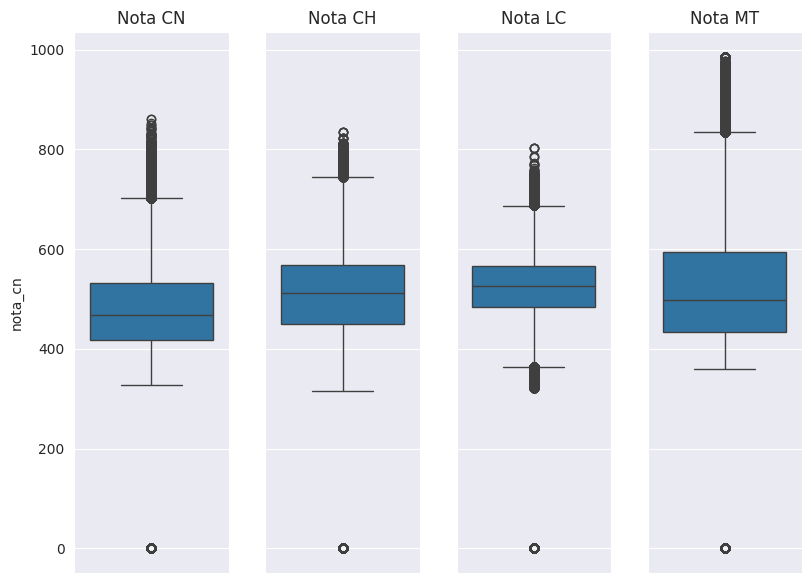

In [ ]:
# Analisando boxplot das notas

figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df, y=coluna_1, ax=graficos[i]).set_title(name_reduzido[i])

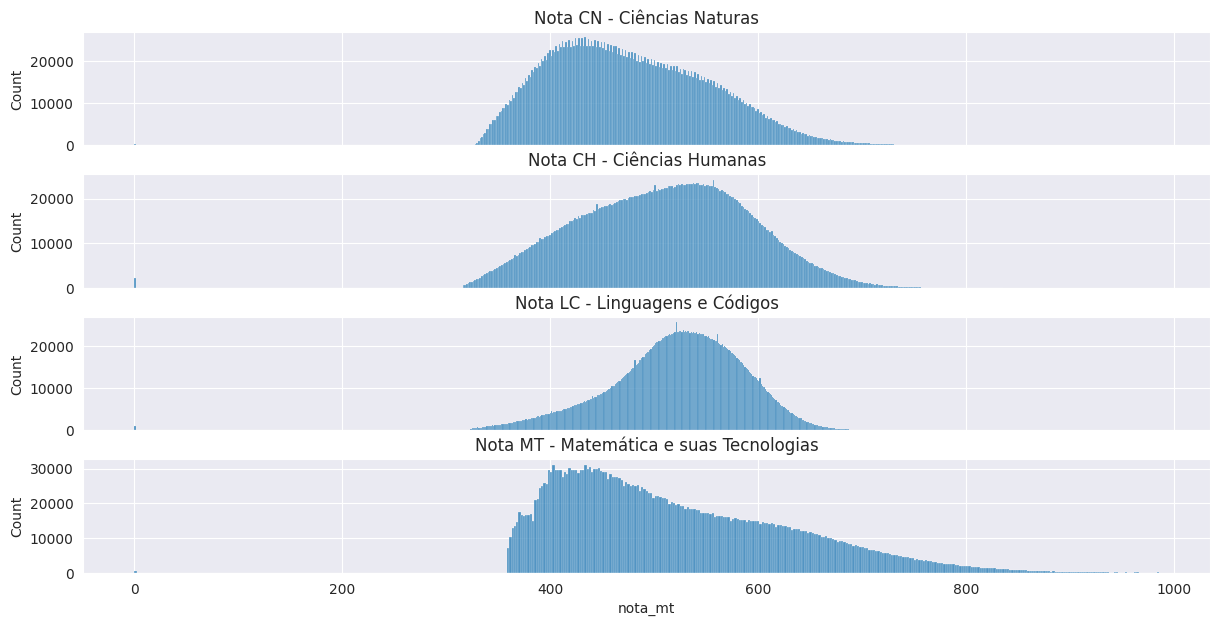

In [ ]:
# Analisando a distribuição das notas
sns.set_style("darkgrid")
figura, graficos = plt.subplots(4, 1, sharex=True, figsize=(12,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.histplot(data=df[coluna_1], ax=graficos[i]).set_title(notas_name[i])

Text(0.5, 1.0, 'Nota da Redação')

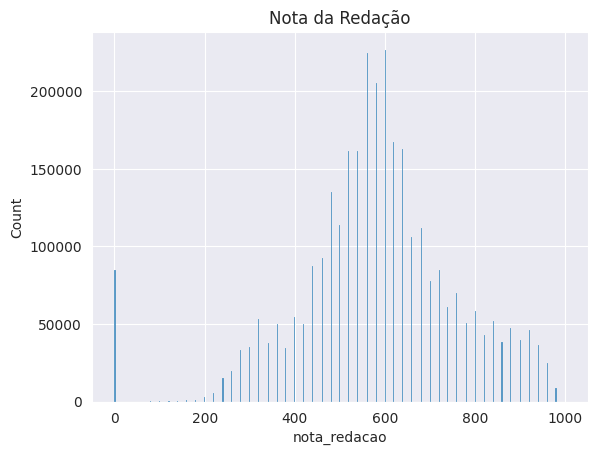

In [ ]:
# Para a nota de redação
sns.histplot(data=df['nota_redacao']).set_title('Nota da Redação')


Text(0.5, 1.0, 'Distribuição da Nota da Redação')

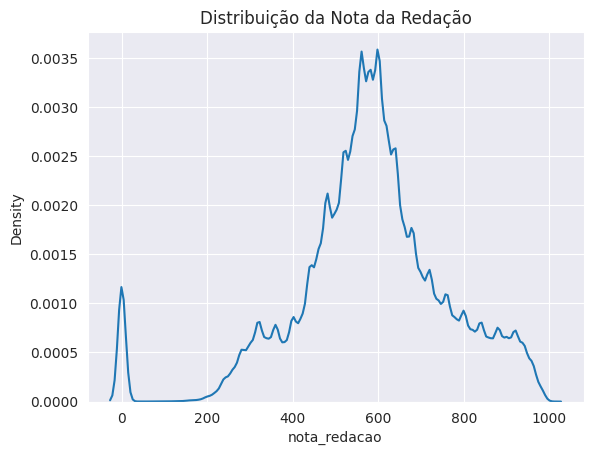

In [ ]:
sns.kdeplot(data=df['nota_redacao']).set_title('Densidade da Nota da Redação')

In [ ]:
df['faixa_etaria2'].value_counts().sort_index()

17 anos               576924
18 anos               683094
19 anos               423914
20 anos               283798
21 anos               190660
22 anos               146884
23 anos               113978
24 anos                91886
25 anos                73155
Entre 26 e 30 anos    222957
Entre 31 e 35 anos    127647
Entre 36 e 40 anos     88231
Entre 41 e 45 anos     53908
Entre 46 e 50 anos     33734
Entre 51 e 55 anos     19299
Entre 56 e 60 anos      9347
Entre 61 e 65 anos      3583
Entre 66 e 70 anos      1265
Maior de 70 anos         432
Menor de 17 anos       31443
Name: faixa_etaria, dtype: int64

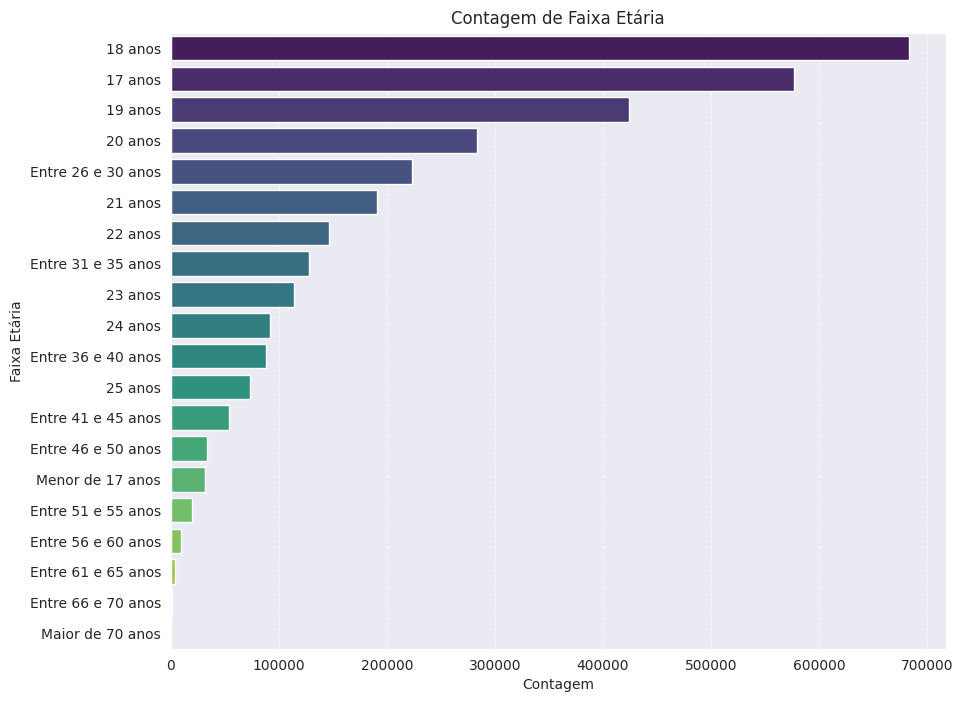

In [ ]:
# Criando gráfico de barras com as faixa_etaria dos participantes da prova
plt.figure(figsize=(10, 8))
sns.countplot(y='faixa_etaria2', data=df, palette='viridis', order=df['faixa_etaria2'].value_counts().index)
plt.title('Contagem de Faixa Etária')
plt.xlabel('Contagem')
plt.ylabel('Faixa Etária')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

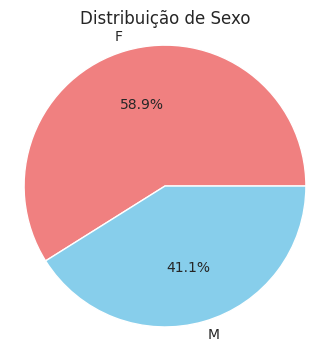

In [ ]:
#
plt.figure(figsize=(4, 4))
df['sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Distribuição de Sexo')
plt.ylabel('')
plt.axis('equal')
plt.show()

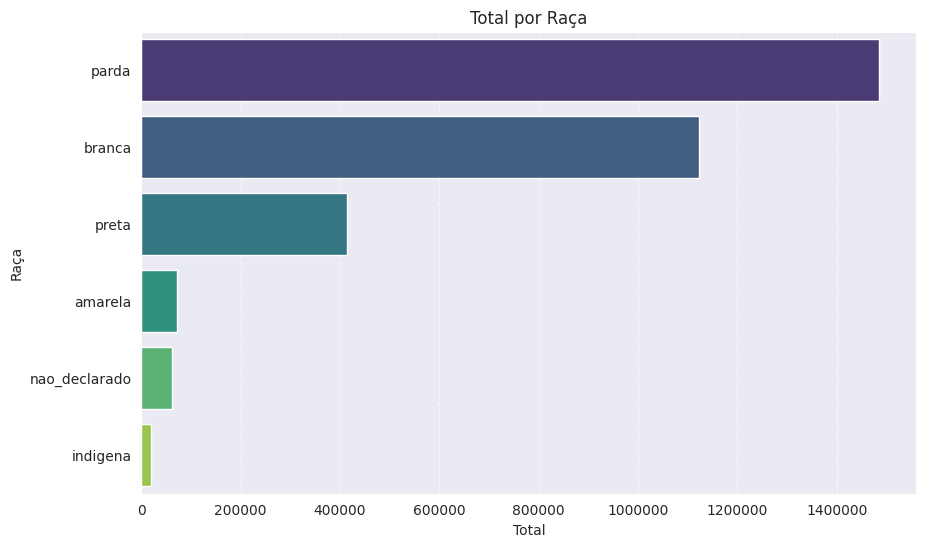

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='raca', palette='viridis', order=df['raca'].value_counts().index)
plt.title('Total por Raça')
plt.xlabel('Total')
plt.ylabel('Raça')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Evitar notação científica no eixo x
plt.ticklabel_format(style='plain', axis='x')

plt.show()

In [ ]:
# Contagem de participantes da prova por Estado
ufs = df['estado'].value_counts()
df_ufs = pd.DataFrame({'uf':ufs.index, 'candidatos':ufs.values})
df_ufs.head()

,uf,candidatos
0,SP,501478
1,MG,329981
2,BA,248102
3,RJ,213452
4,CE,184026


In [ ]:
import plotly.express as px

fig = px.treemap(data_frame=df_ufs, path=['uf'], values='candidatos')

fig.update_traces(root_color='lightgrey')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

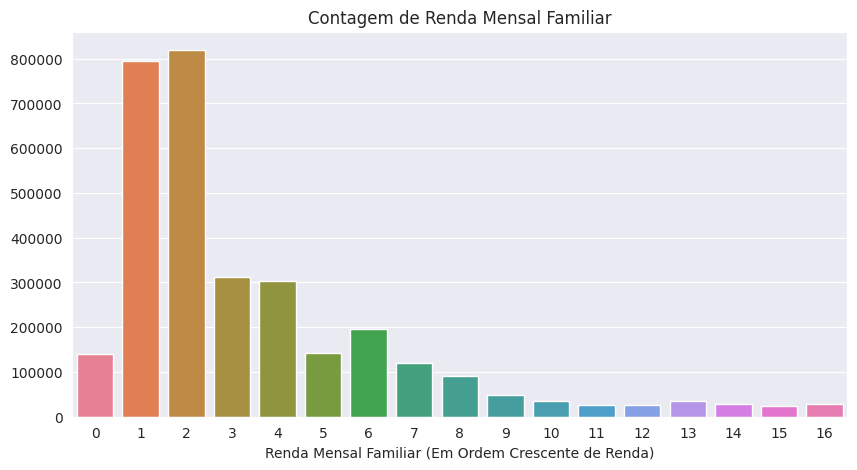

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='renda_mensal_familiar', palette='husl', order=df['renda_mensal_familiar'].sort_values().unique())
plt.xlabel('Renda Mensal Familiar (Em Ordem Crescente de Renda)')
plt.ylabel('')
plt.title('Contagem de Renda Mensal Familiar')
plt.show()

### Perfil dos Alunos

- Grande parte dos candidatos estão concentrado nas menores rendas familiar

- Mais da metade dos candidatos são PPI (Preto, Pardo ou Indigena)

- A faixa etaria mais densa é entre 17 a 22 anos

## Relacionando as notas com características dos candidatos (sem interferencia socioeconomico)

In [ ]:
colunas_notas[:4]

['nota_cn', 'nota_ch', 'nota_lc', 'nota_mt']

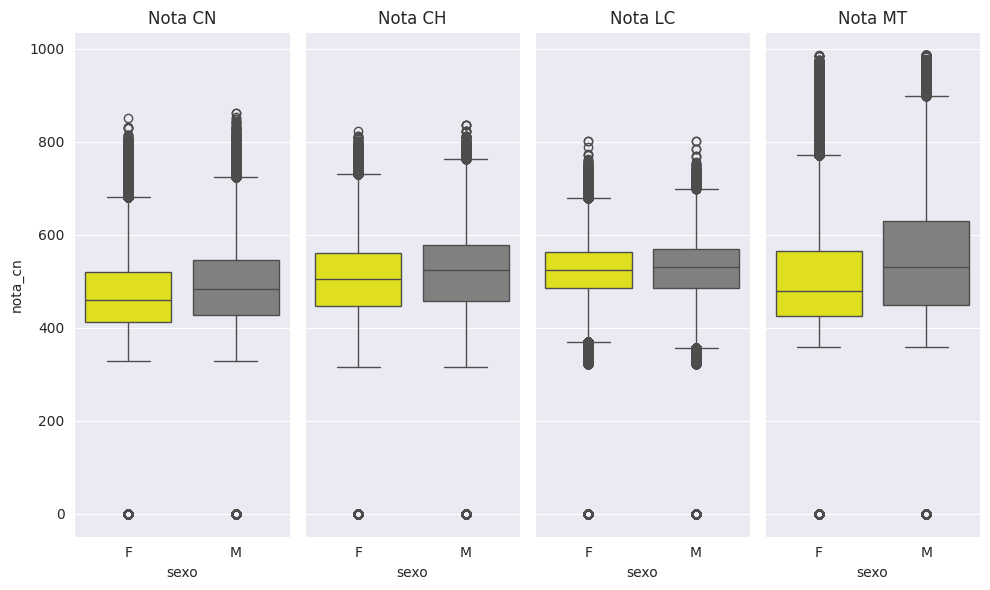

In [ ]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(10,6))

for i, coluna in enumerate(colunas_notas[:4]):
    sns.boxplot(x='sexo', y=coluna, data=df, ax=axs[i], palette=['yellow','gray']).set_title(name_reduzido[i])

plt.tight_layout()
plt.show()

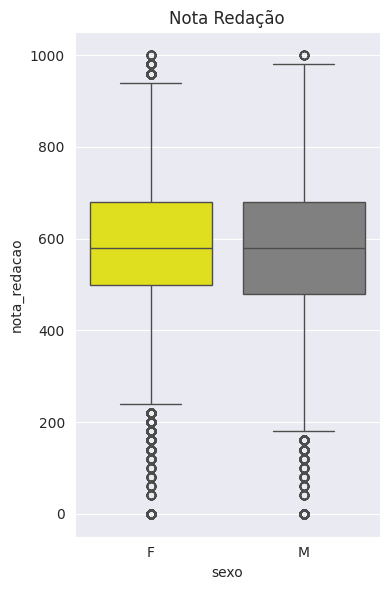

In [ ]:
fig, ax = plt.subplots(sharey=True, figsize=(4, 6))

sns.boxplot(x='sexo', y='nota_redacao', data=df, ax=ax, palette=['yellow','gray'])
ax.set_title('Nota Redação')

plt.tight_layout()
plt.show()

In [ ]:
# Criando uma coluna para verificar a diferença de desempenho entre alunos com idade maior que 25 anos
def verificar_25mais(idade):
    if idade in ['Entre 26 e 30 anos', 'Entre 31 e 35 anos', 'Entre 36 e 40 anos',
                 'Entre 41 e 45 anos', 'Entre 46 e 50 anos', 'Entre 51 e 55 anos', 'Entre 56 e 60 anos',
                 'Entre 61 e 65 anos', 'Entre 66 e 70 anos', 'Maior de 70 anos']:
        return 'S'
    else:
        return 'N'

df['25_anos'] = df['faixa_etaria2'].apply(lambda x: verificar_25mais(x))

df.head(2)

In [ ]:
df['25_anos'].value_counts()

N    2614193
S     560019
Name: 25_anos, dtype: int64

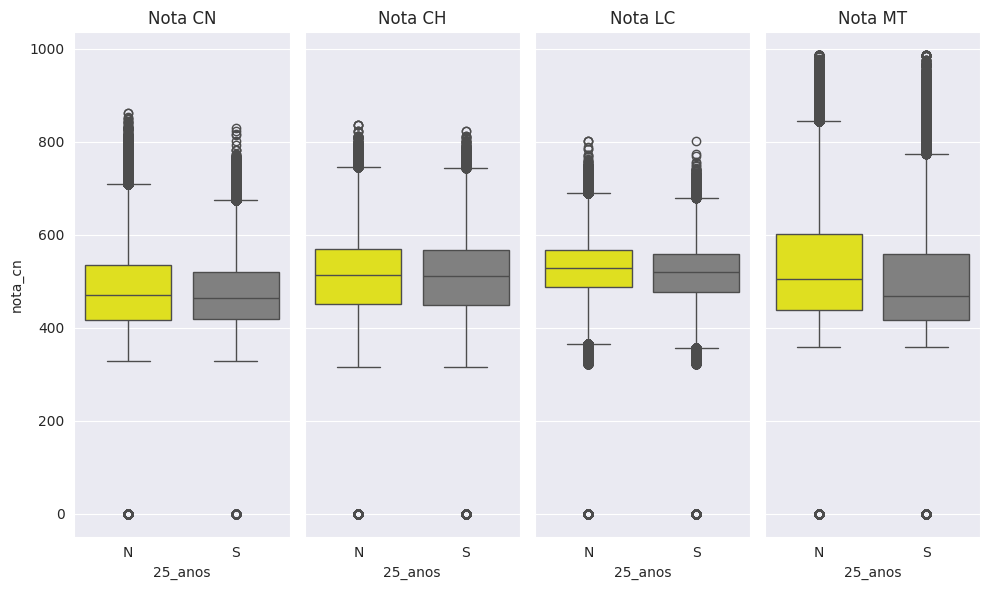

In [ ]:
# Plotando grafico de desempenho com a idade
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(10,6))

for i, coluna in enumerate(colunas_notas[:4]):
    sns.boxplot(x='25_anos', y=coluna, data=df, ax=axs[i], palette=['yellow','gray']).set_title(name_reduzido[i])

plt.tight_layout()
plt.show()

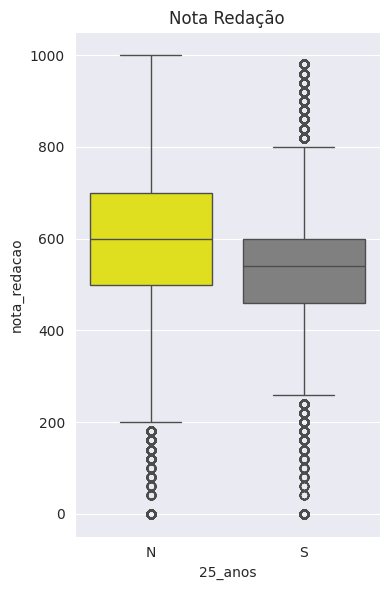

In [ ]:
fig, ax = plt.subplots(sharey=True, figsize=(4, 6))

sns.boxplot(x='25_anos', y='nota_redacao', data=df, ax=ax, palette=['yellow','gray'])
ax.set_title('Nota Redação')

plt.tight_layout()

plt.show()

<Axes: xlabel='faixa_etaria', ylabel='nota_media'>

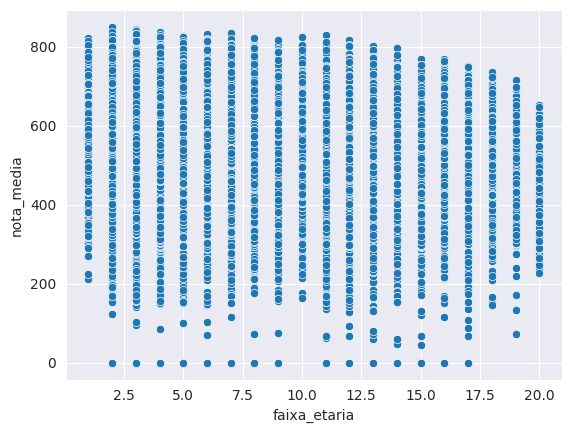

In [ ]:
# Scatter plot com a faixa etaria da idade com a nota_media obtida no enem
sns.scatterplot(data=df, x='faixa_etaria', y='nota_media')

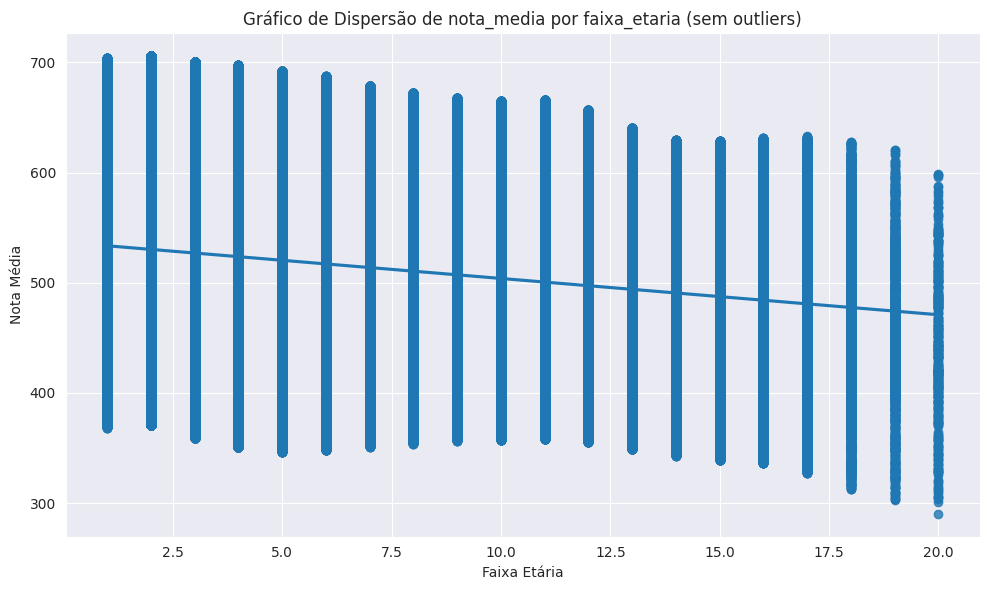

In [ ]:
mean_by_faixa_etaria = df.groupby('faixa_etaria')['nota_media'].mean()
std_by_faixa_etaria = df.groupby('faixa_etaria')['nota_media'].std()

# Definir o limite de desvio padrão para identificar outliers
std_limit = 2

# Filtrar os outliers por faixa etaria
filtered_df = pd.DataFrame(columns=df.columns)
for faixa_etaria, group_df in df.groupby('faixa_etaria'):
    lower_limit = mean_by_faixa_etaria[faixa_etaria] - std_limit * std_by_faixa_etaria[faixa_etaria]
    upper_limit = mean_by_faixa_etaria[faixa_etaria] + std_limit * std_by_faixa_etaria[faixa_etaria]
    filtered_group_df = group_df[(group_df['nota_media'] >= lower_limit) & (group_df['nota_media'] <= upper_limit)]
    filtered_df = pd.concat([filtered_df, filtered_group_df])

filtered_df['faixa_etaria'] = filtered_df['faixa_etaria'].astype(float)

plt.figure(figsize = (10, 6))
sns.regplot(x = filtered_df['faixa_etaria'], y = filtered_df['nota_media'])
plt.title('Gráfico de Dispersão de nota_media por faixa_etaria (sem outliers)')
plt.xlabel('Faixa Etária')
plt.ylabel('Nota Média')

plt.tight_layout()
plt.show()

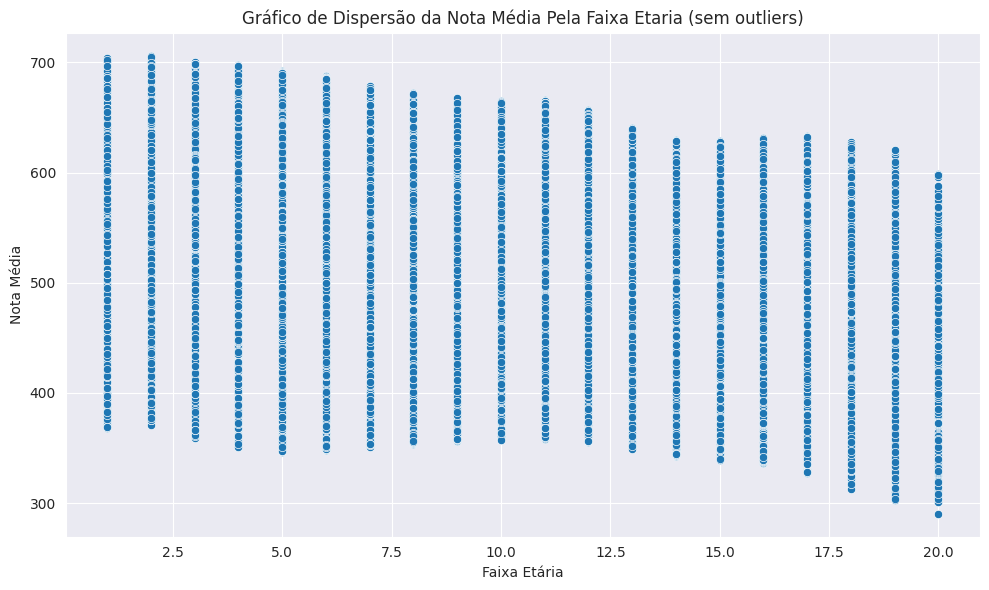

In [ ]:
# Exibir o gráfico de dispersão sem os outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='faixa_etaria', y='nota_media')
plt.title('Gráfico de Dispersão da Nota Média Pela Faixa Etaria (sem outliers)')
plt.xlabel('Faixa Etária')
plt.ylabel('Nota Média')
plt.tight_layout()
plt.show()

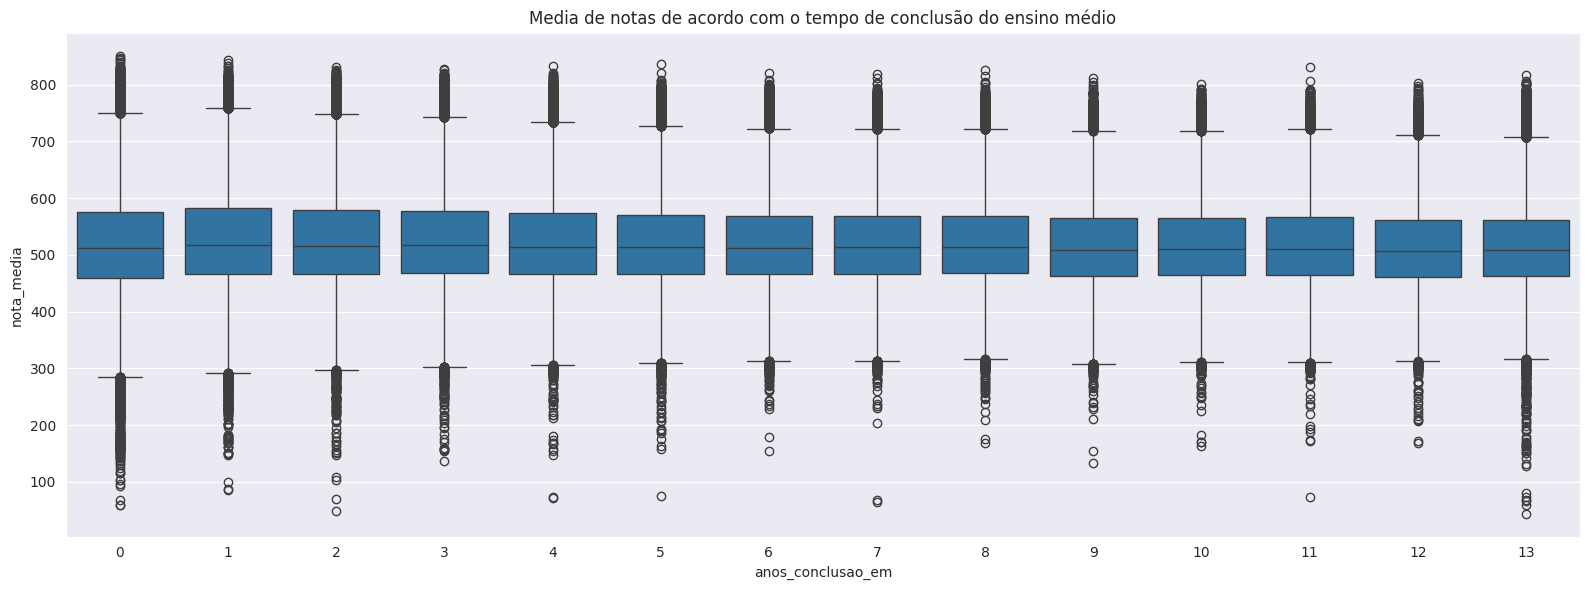

In [ ]:
# Boxplot com a média das notas obtidas no enem pela variavel 'ano_conclusao_em' que descreve a quanto tempo o candidato concluiu o ensino medio
fig, ax = plt.subplots(sharey=True, figsize=(16, 6))

sns.boxplot(x='anos_conclusao_em', y='nota_media', data=df, ax=ax)
ax.set_title('Media de notas de acordo com o tempo de conclusão do ensino médio')

plt.tight_layout()
plt.show()

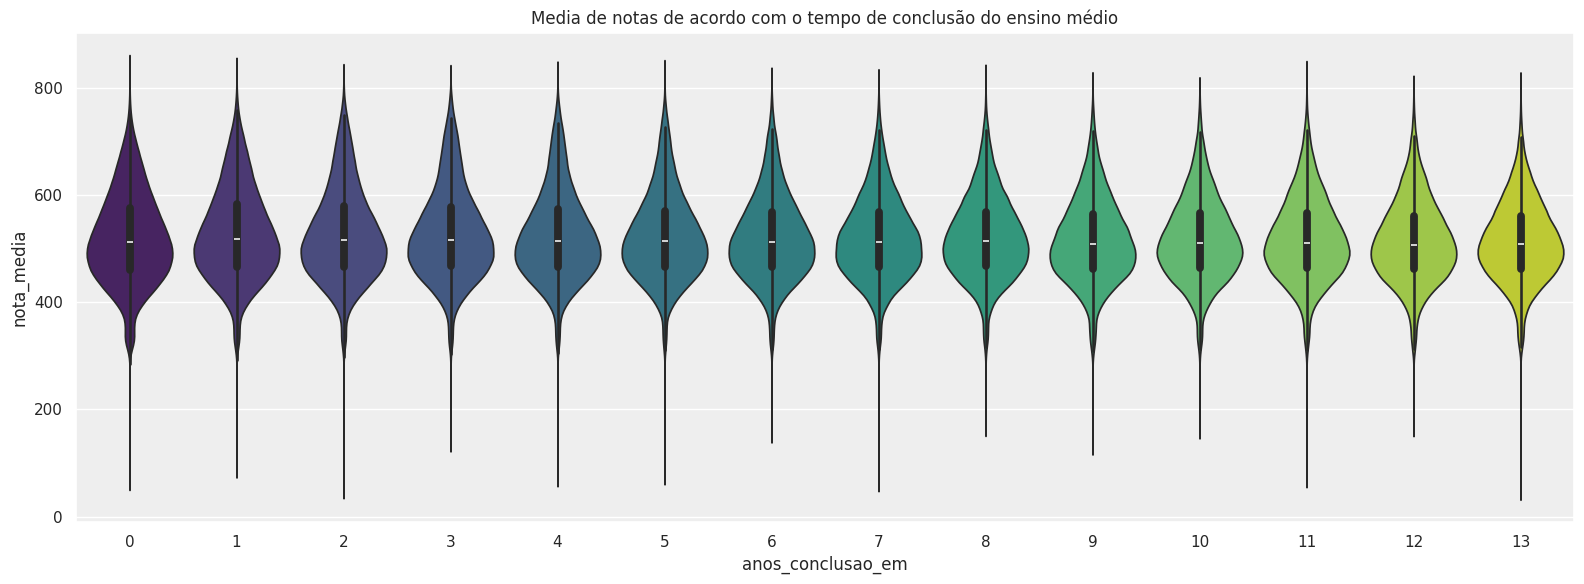

In [ ]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='anos_conclusao_em', y='nota_media', data=df, palette='viridis')
plt.title('Media de notas de acordo com o tempo de conclusão do ensino médio')
plt.tight_layout()
plt.show()

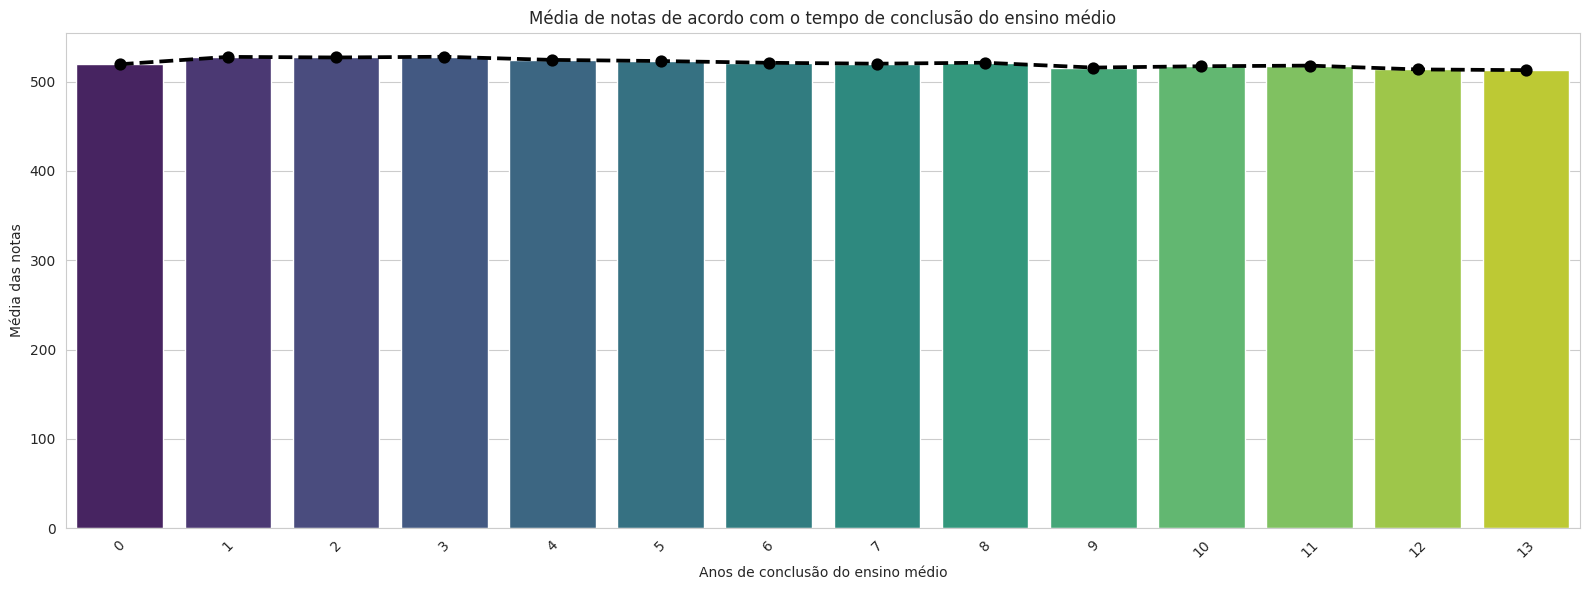

In [ ]:
# gráfico com a média das notas obtidas no enem pela variavel 'ano_conclusao_em' que descreve a quanto tempo o candidato concluiu o ensino medio

plt.figure(figsize=(10, 6))
sns.barplot(x='anos_conclusao_em', y='nota_media', data=df, palette='viridis')
sns.lineplot(x='anos_conclusao_em', y='nota_media', data=df, color='red')

plt.title('Média de notas de acordo com o tempo de conclusão do ensino médio')
plt.xlabel('Tempo de conclusão do ensino médio (anos)')
plt.ylabel('Média das notas')

plt.tight_layout()
plt.show()

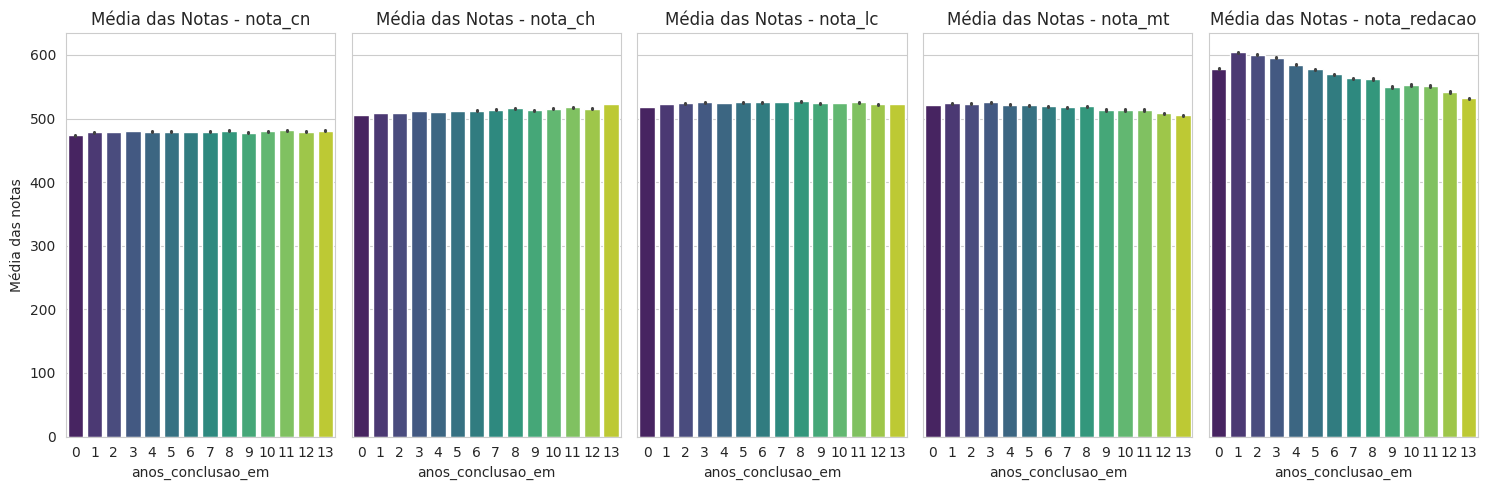

In [ ]:
# Boxplot com a média das notas individuais obtidas no enem pela variavel 'ano_conclusao_em' que descreve a quanto tempo o candidato concluiu o ensino medio
fig, axs = plt.subplots(1, len(colunas_notas), figsize=(15, 5), sharey=True)

for i, coluna in enumerate(colunas_notas):
    sns.barplot(x='anos_conclusao_em', y=coluna, data=df, ax=axs[i], palette='viridis')
    axs[i].set_ylabel('Média das notas')
    axs[i].set_title(f'Média das Notas - {coluna}')
    axs[i].legend().remove()


plt.xlabel('Tempo de conclusão do ensino médio (anos)')
plt.tight_layout()
plt.show()

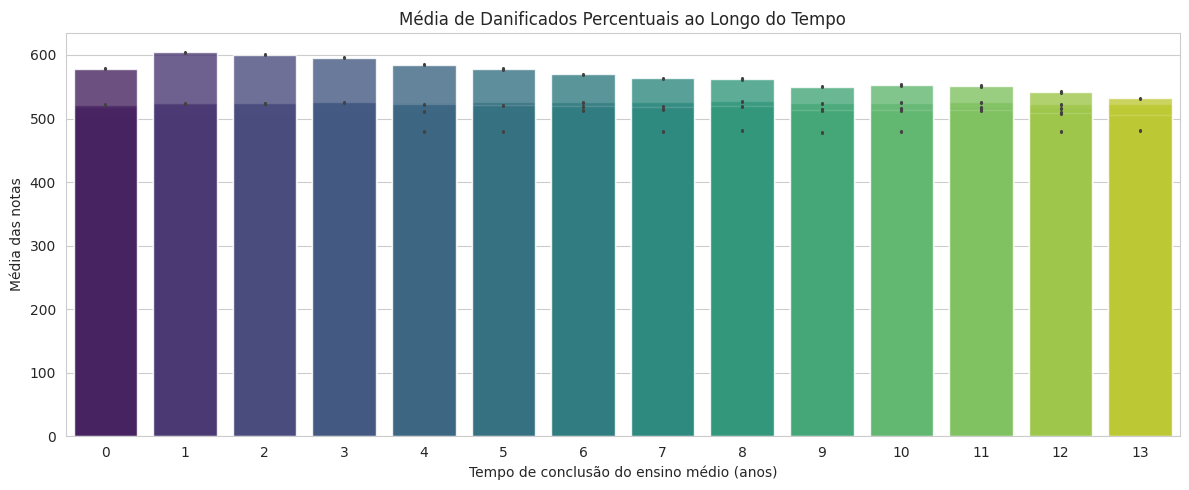

In [ ]:
# Gráfico de colunas empilhado com as notas obtidas pelos candidatos.

plt.figure(figsize=(12, 5))
for coluna in colunas_notas:
    sns.barplot(x='anos_conclusao_em', y=coluna, data=df, alpha=0.8, label=coluna, palette='viridis', )

plt.xlabel('Tempo de conclusão do ensino médio (anos)')
plt.ylabel('Média das notas')
plt.title('Média de Danificados Percentuais ao Longo do Tempo')

plt.tight_layout()
plt.show()

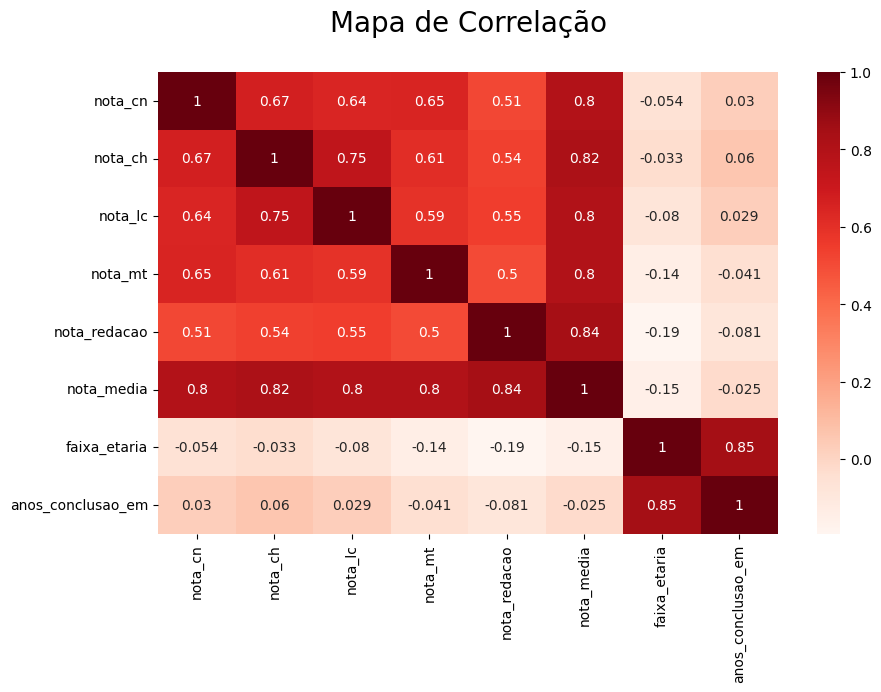

In [ ]:
corr1 = df.loc[:, colunas_notas + ['faixa_etaria'] + ['anos_conclusao_em']]
corr1 = corr1.corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr1, annot = True, cmap = "Reds")
plt.title("Mapa de Correlação\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

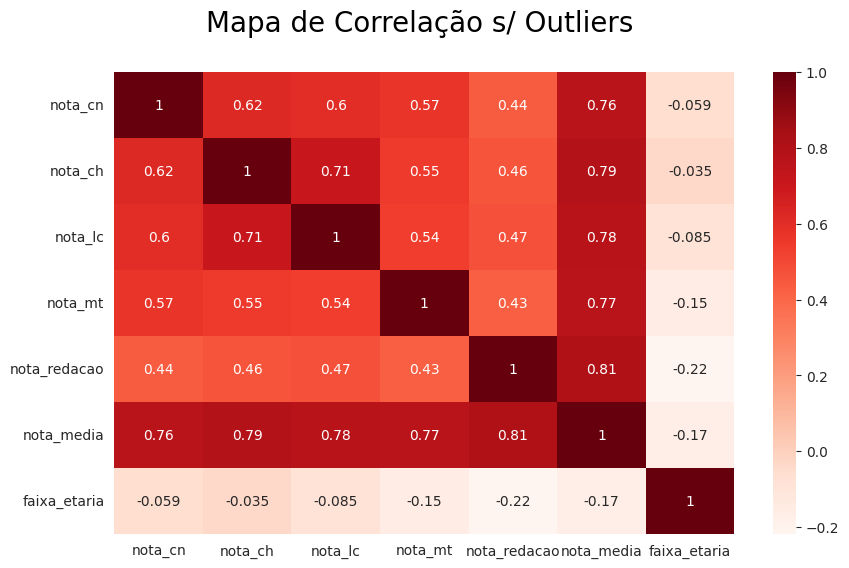

In [ ]:
# Correlação sem a presença de outliers

corr2 = filtered_df.loc[:, colunas_notas + ['faixa_etaria'] + ['anos_conclusao_em']]
corr2 = corr2.corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr2, annot = True, cmap = "Reds")
plt.title("Mapa de Correlação s/ Outliers \n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

- O tempo de conclusão do ensino médio não afeta o desempenho geral no enem, exceto pela nota da redação

- Os sexo parece não impactar no desempenho

- Há um leve declinio do desempenho no enem conforme o avanço da idade do candidato.


Com base na análise dos dados do ENEM, observamos que o tempo de conclusão do ensino médio não tem impacto geral no desempenho no exame, exceto pela nota da redação, onde candidatos que se formaram mais recentemente tendem a se destacar. O sexo dos candidatos não parece afetar significativamente o desempenho. No entanto, há um leve declínio no desempenho conforme a idade dos candidatos aumenta, indicando possíveis diferenças na preparação e experiência educacional ao longo do tempo. Em resumo, o ENEM avalia habilidades independentemente do gênero, mas a experiência educacional e a idade podem influenciar sutilmente o desempenho.

## Relacionando as notas com características socioeconomicas e culturais dos candidatos

### Pierre Bourdieu

- Para essa análise é bom definir alguns critérios para a avaliação. Para isso recorremos a Teoria de um grande sociólogo e intelectual no ambito da educação chamado Pierre Bourdieu. O mesmo destaca a importância do capital cultural (termo criado por ele mesmo para definir o quão próximo o individuo é da cultura considerada 'legitima' x 'não legitima') e econômico na trajetória educacional dos indivíduos. Bourdieu argumenta que as classes sociais possuem diferentes capitais culturais, que moldam suas expectativas e escolhas educacionais.


### Capital Cultural

- O capital cultural refere-se ao acesso que temos à cultura considerada legítima, como visitas a museus, cinemas, concertos e teatros, preferências musicais, leitura de livros, entre outras formas de cultura. Nesta pesquisa, o capital cultural será definido como a formação dos pais.
- Este aspecto é de extrema importância porque a presença de um diploma familiar pode indicar o acesso dos pais do candidato a uma educação formal. Bourdieu indica que este ponto é relevante porque uma vez que os pais tenham acesso a este tipo de educação, percebem que há um retorno, uma vez que pessoas diplomadas têm uma média salarial maior do que aqueles não formados, e acabam incentivando os filhos a seguir o mesmo caminho. Por outro lado, aqueles que desconhecem dessa vantagem acabam não dando a devida importância.


### Contexto socioeconomico

- Além do capital cultural, é fundamental considerar o contexto socioeconômico no qual os indivíduos estão inseridos. O capital econômico desempenha um papel significativo, pois influencia diretamente o acesso a recursos e oportunidades educacionais mais sofisticadas. Por exemplo, famílias de classes sociais mais altas têm mais recursos financeiros para investir em educação privada de qualidade, como escolas renomadas, aulas particulares e atividades extracurriculares enriquecedoras. Isso cria um ciclo de vantagem, onde o acesso a esses recursos adicionais melhora as chances de sucesso educacional e, consequentemente, profissional, perpetuando assim as desigualdades sociais.


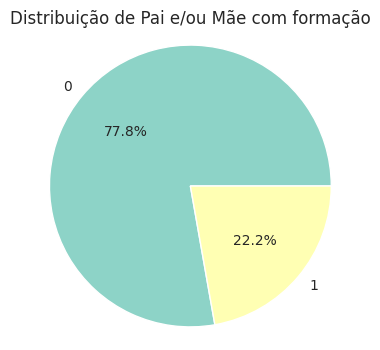

In [ ]:
sns.set_palette("Set3")

# Plotando gráfico de pizza com a formação dos pais dos candidatos
plt.figure(figsize=(4, 4))
df['superior_pais'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Pai e/ou Mãe com formação')
plt.ylabel('')
plt.axis('equal')
plt.show()

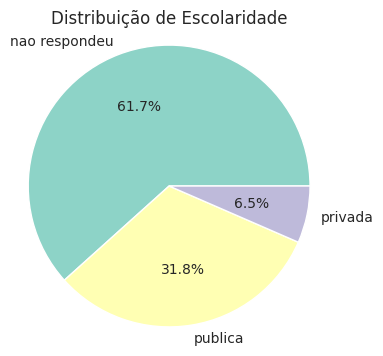

In [ ]:
# Plotando gráfico de pizza com o tipo de escolaridade dos candidatos
plt.figure(figsize=(4, 4))
df['tipo_escolaridade'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Escolaridade')
plt.ylabel('')
plt.axis('equal')
plt.show()

In [ ]:
df['tipo_escolaridade'].value_counts()

nao respondeu    1957070
publica          1009819
privada           207297
Name: tipo_escolaridade, dtype: int64

In [ ]:
df_escolaridade = df.loc[df['tipo_escolaridade'].isin(['publica', 'privada'])]


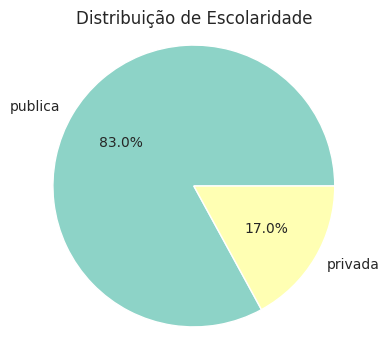

In [ ]:
# Plotando gráfico de pizza com o tipo de escolaridade dos candidatos (sem os candidatos que não responderam)
plt.figure(figsize=(4, 4))
df_escolaridade['tipo_escolaridade'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Escolaridade')
plt.ylabel('')
plt.axis('equal')
plt.show()

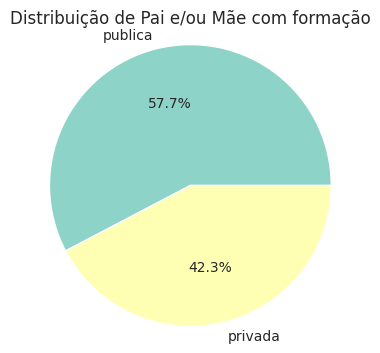

In [ ]:
# Plotando gráfico de pizza com a formação dos pais dos candidatos quando há formação no ensino superior
plt.figure(figsize=(4, 4))
df_escolaridade[df_escolaridade['superior_pais'] == 1]['tipo_escolaridade'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title('Distribuição de Pai e/ou Mãe com formação')
plt.ylabel('')
plt.axis('equal')
plt.show()

#### *DISCUSSÃO* "Como mentir com estatistica"

- É importante notar que a partir desse gráfico notamos que há mais pais e mães formados para os alunos da rede pública do que da rede particular. Na verdade, essa relação deveria ser feita com uma porcentagem total dos alunos da rede publica, e a porcentagem relativa dos pais/mães formados dos mesmos, e igualmente para a rede privada.

- Acontece que para os alunos que assinalaram ser da rede pública tinhamos um total de 1009819 e para a rede privada cerca de 207297. Quando não há uma segregação para o valor total e relativo para cada área, pode gerar essa ilusão por estarem em maior quantidade.

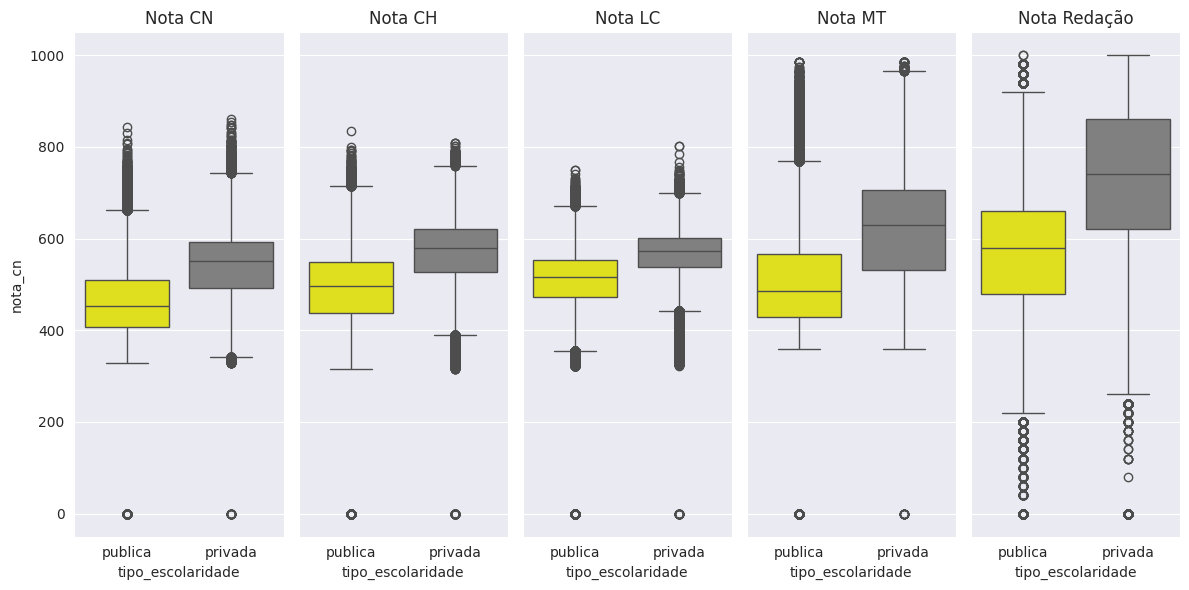

In [ ]:
name_reduzido.append('Nota Redação')

fig, axs = plt.subplots(1, 5, sharey=True, figsize=(12,6))

for i, coluna in enumerate(colunas_notas[:5]):
    sns.boxplot(x='tipo_escolaridade', y=coluna, data=df_escolaridade, ax=axs[i], palette=['yellow','gray']).set_title(name_reduzido[i])

plt.tight_layout()
plt.show()

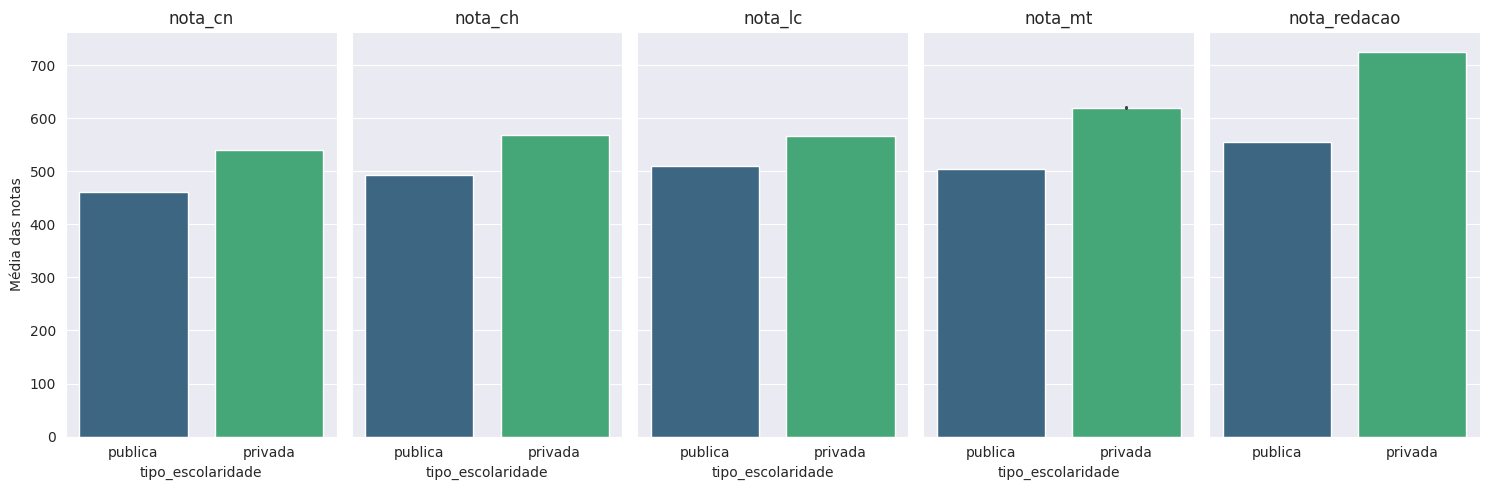

In [ ]:
# Boxplot com a média das notas individuais obtidas no enem pela variavel 'ano_conclusao_em' que descreve a quanto tempo o candidato concluiu o ensino medio
fig, axs = plt.subplots(1, len(colunas_notas[:5]), figsize=(15, 5), sharey=True)

for i, coluna in enumerate(colunas_notas[:5]):
    sns.barplot(x='tipo_escolaridade', y=coluna, data=df_escolaridade, ax=axs[i], palette='viridis')
    axs[i].set_ylabel('Média das notas')
    axs[i].set_title(f'{coluna}')
    axs[i].legend().remove()


plt.xlabel('')
plt.tight_layout()
plt.show()

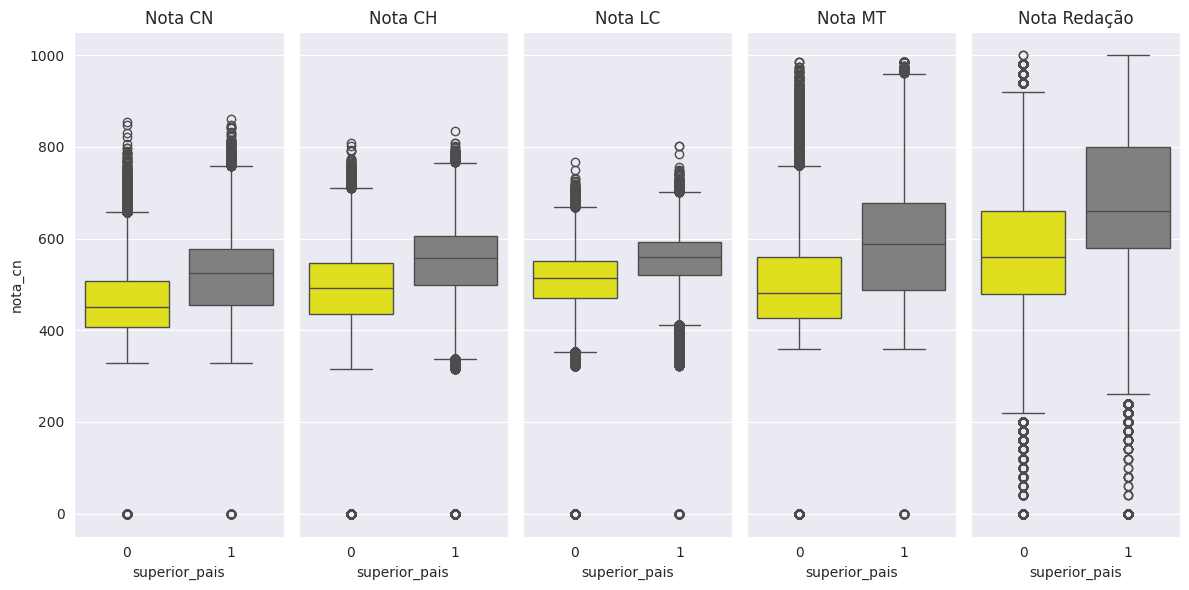

In [ ]:
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(12,6))

for i, coluna in enumerate(colunas_notas[:5]):
    sns.boxplot(x='superior_pais', y=coluna, data=df_escolaridade, ax=axs[i], palette=['yellow','gray']).set_title(name_reduzido[i])

plt.tight_layout()
plt.show()

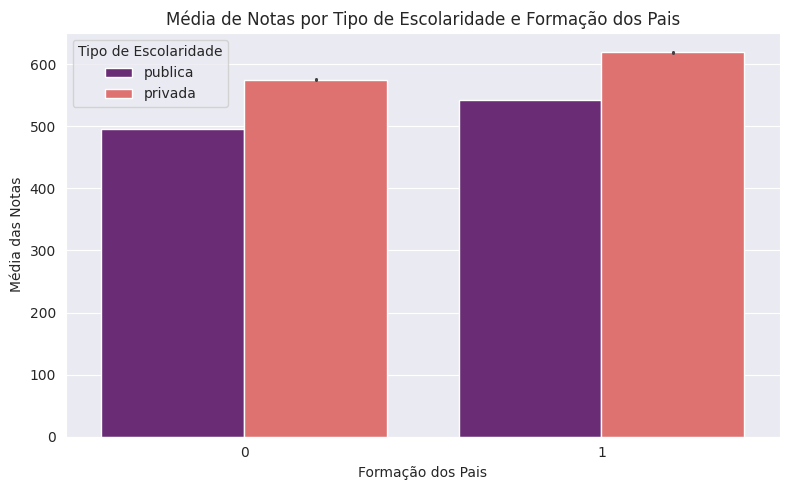

In [ ]:
# Gráfico de barras com a média de notas por tipo de escolaridade e formação dos pais
plt.figure(figsize=(8, 5))
sns.barplot(x='superior_pais', y='nota_media', hue='tipo_escolaridade', data=df_escolaridade, palette='magma')


plt.title('Média de Notas por Tipo de Escolaridade e Formação dos Pais')
plt.xlabel('Formação dos Pais')
plt.ylabel('Média das Notas')

plt.legend(title='Tipo de Escolaridade')
plt.tight_layout()
plt.show()

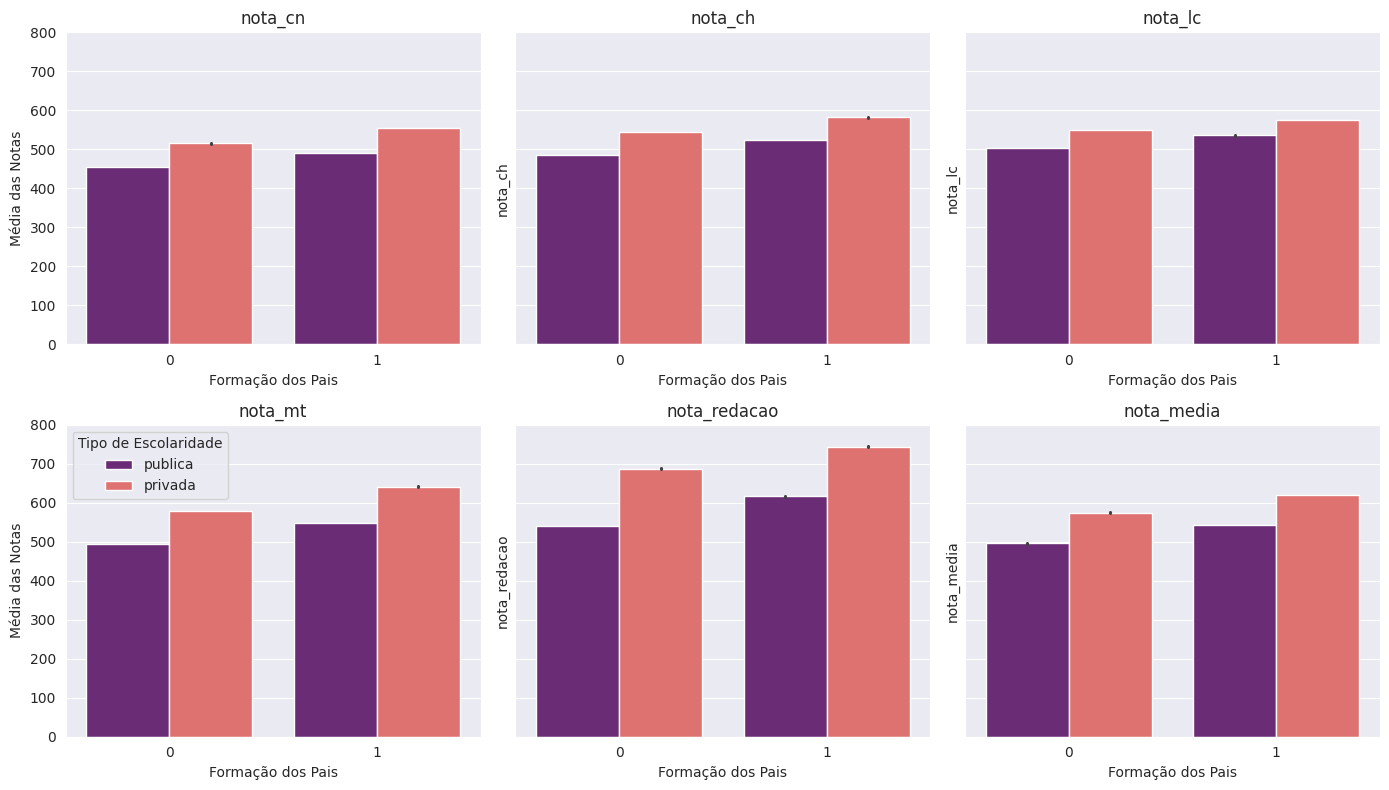

CPU times: user 2min 47s, sys: 490 ms, total: 2min 48s
Wall time: 2min 53s


In [ ]:
%%time

num_linhas = 2
num_colunas = 3

# Criando os subplots com as médias das notas por escolaridade e formação dos pais
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(14, 8))

for i, coluna in enumerate(colunas_notas):
    linha = i // num_colunas
    col = i % num_colunas
    sns.barplot(x='superior_pais', y=coluna, hue='tipo_escolaridade', data=df_escolaridade, palette='magma', ax=axs[linha, col])
    axs[linha, col].set_title(f'{coluna}')
    axs[linha, col].legend().remove()

    axs[linha, col].set_ylim(0, 800)
    axs[linha, col].yaxis.grid(True)

    if col != 0:
        axs[linha, col].tick_params(axis='y', labelleft=False)

    if linha == 1:
      axs[linha, col].set_xlabel('Formação dos Pais')
    else:
      axs[linha, col].set_xlabel(' ')


axs[0, 0].set_ylabel('Média das Notas')
axs[1, 0].set_ylabel('Média das Notas')
axs[1, 0].legend(title='Tipo de Escolaridade')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='renda_mensal_familiar', palette='husl', order=df['renda_mensal_familiar'].sort_values().unique())
plt.xlabel('Renda Mensal Familiar (Em Ordem Crescente de Renda)')
plt.ylabel('')
plt.title('Contagem de Renda Mensal Familiar')
plt.show()

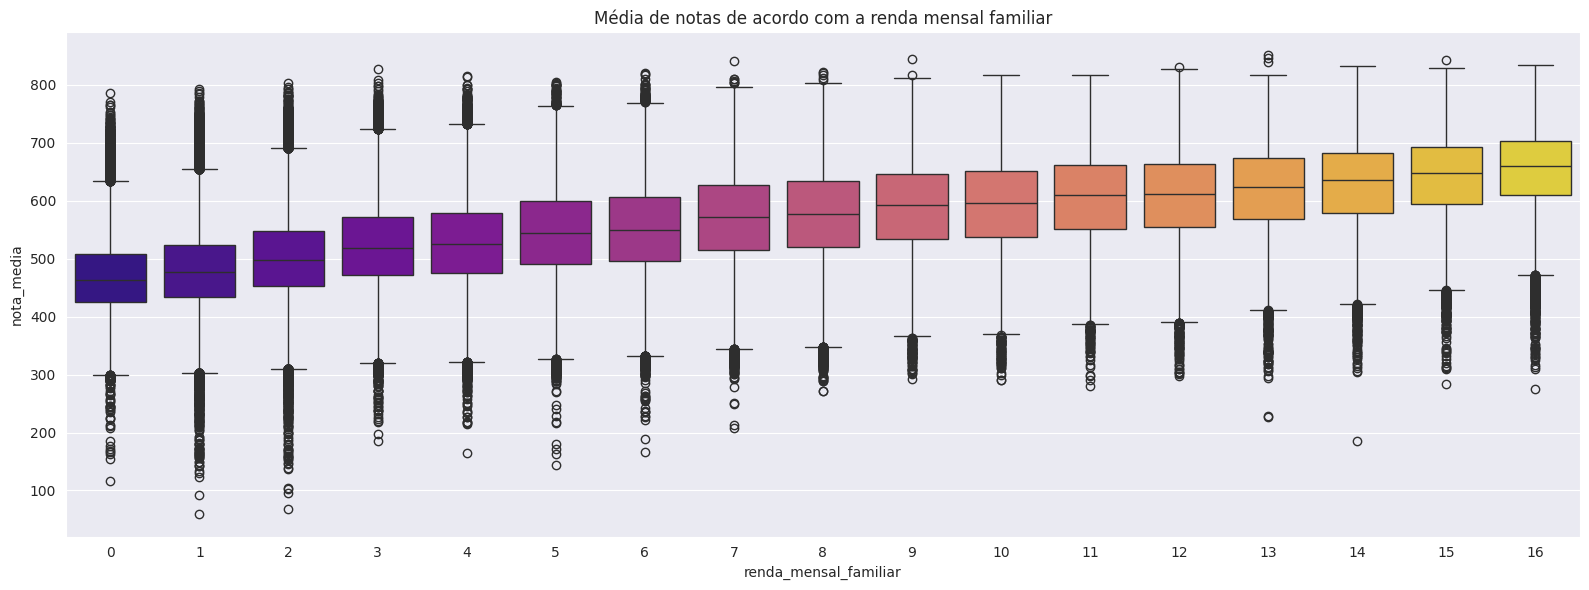

In [ ]:
# Boxplot com a média das notas obtidas no enem pela variavel 'ano_conclusao_em' que descreve a quanto tempo o candidato concluiu o ensino medio
# Boxplot com a média das notas pela renda mensal familiar
plt.figure(figsize=(16, 6))
sns.boxplot(x='renda_mensal_familiar', y='nota_media', data=df_escolaridade, palette='plasma')
plt.title('Média de notas de acordo com a renda mensal familiar')
plt.tight_layout()
plt.show()


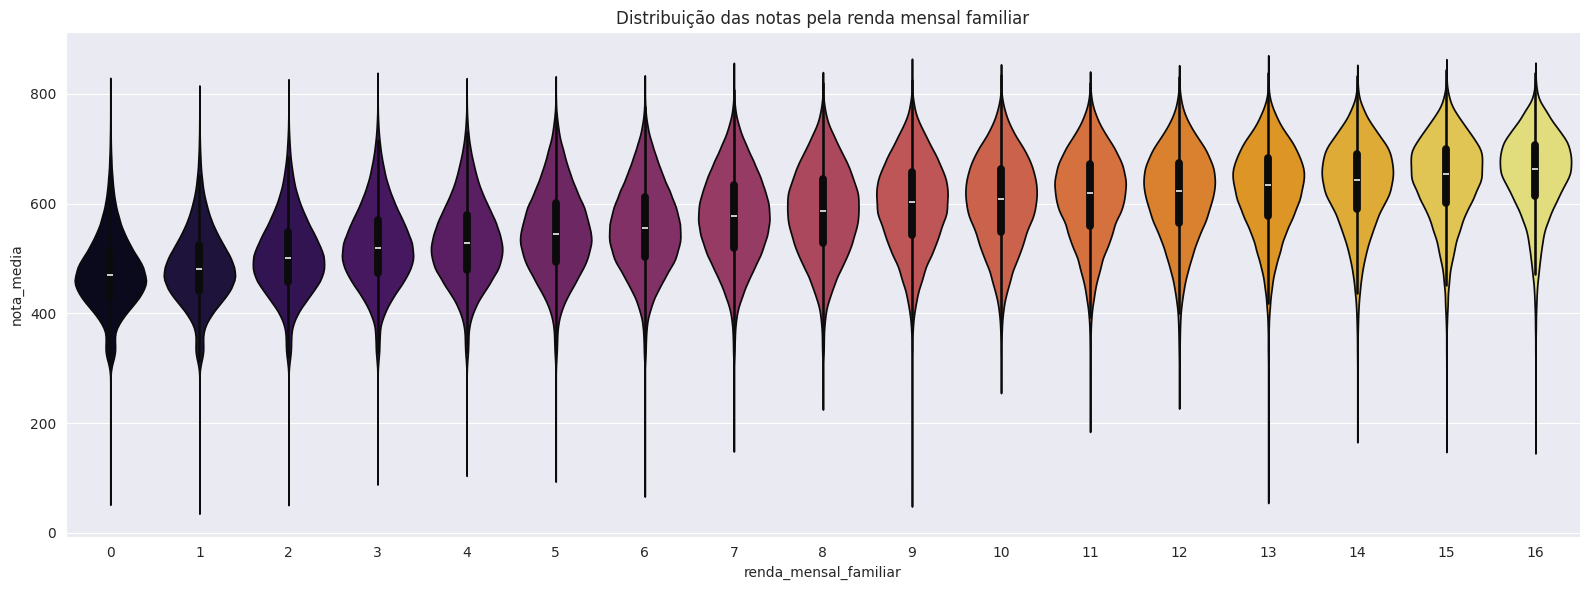

In [ ]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='renda_mensal_familiar', y='nota_media', data=df, palette='inferno')
plt.title('Distribuição das notas pela renda mensal familiar')
plt.tight_layout()
plt.show()

In [ ]:
mean_by_faixa_etaria = df_escolaridade.groupby('renda_mensal_familiar')['nota_media'].mean()
std_by_faixa_etaria = df_escolaridade.groupby('renda_mensal_familiar')['nota_media'].std()

# Definir o limite de desvio padrão para identificar outliers
std_limit = 2

# Filtrar os outliers por faixa etaria
filtered_df = pd.DataFrame(columns=df_escolaridade.columns)
for faixa_etaria, group_df in df_escolaridade.groupby('renda_mensal_familiar'):
    lower_limit = mean_by_faixa_etaria[faixa_etaria] - std_limit * std_by_faixa_etaria[faixa_etaria]
    upper_limit = mean_by_faixa_etaria[faixa_etaria] + std_limit * std_by_faixa_etaria[faixa_etaria]
    filtered_group_df = group_df[(group_df['nota_media'] >= lower_limit) & (group_df['nota_media'] <= upper_limit)]
    filtered_df = pd.concat([filtered_df, filtered_group_df])

filtered_df['renda_mensal_familiar'] = filtered_df['renda_mensal_familiar'].astype(float)


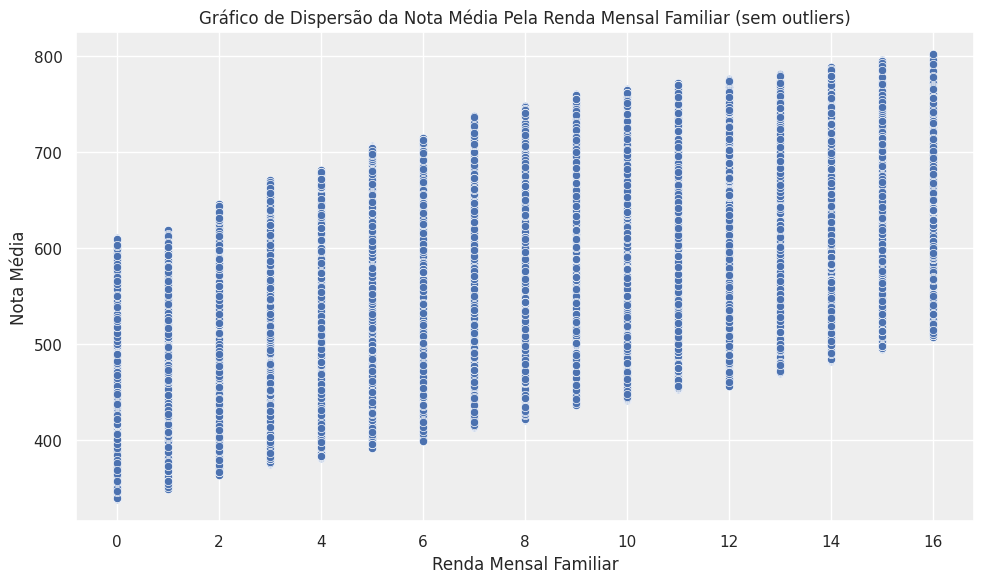

In [ ]:
# Exibir o gráfico de dispersão sem os outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='renda_mensal_familiar', y='nota_media')
plt.title('Gráfico de Dispersão da Nota Média Pela Renda Mensal Familiar (sem outliers)')
plt.xlabel('Renda Mensal Familiar')
plt.ylabel('Nota Média')
plt.tight_layout()
plt.show()

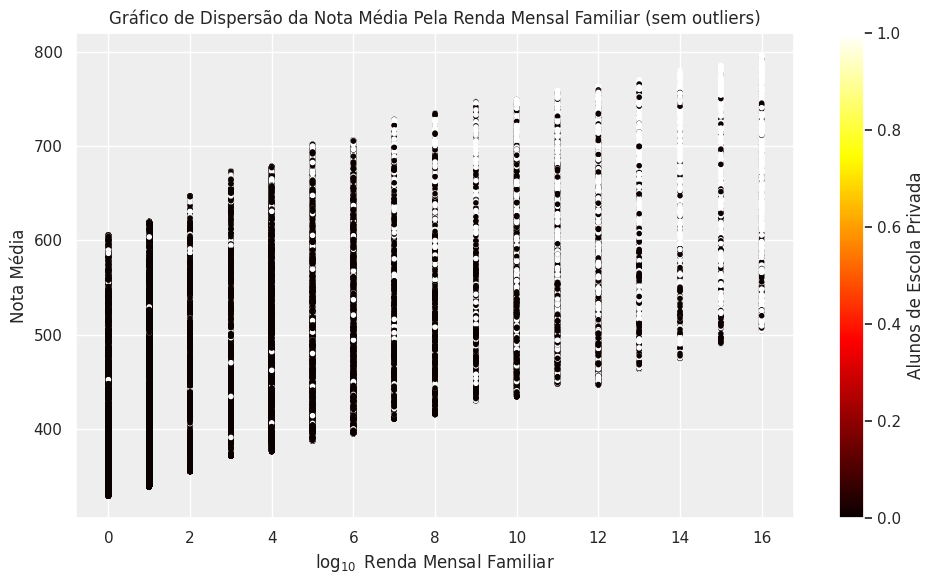

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter((filtered_df['renda_mensal_familiar']), filtered_df['nota_media'], marker='.', c=filtered_df['escola_privada'], cmap='hot')
plt.xlabel('$\log_{10}$ Renda Mensal Familiar')
plt.ylabel('Nota Média')
plt.colorbar().set_label('Alunos de Escola Privada')
plt.title('Gráfico de Dispersão da Nota Média Pela Renda Mensal Familiar (sem outliers)')
plt.tight_layout()
plt.show()

In [ ]:
# Função que atribui 1 para escola_privada
df['escola_privada'] = df['tipo_escolaridade'].apply(lambda x: 1 if x == 'privada' else 0).astype(int)

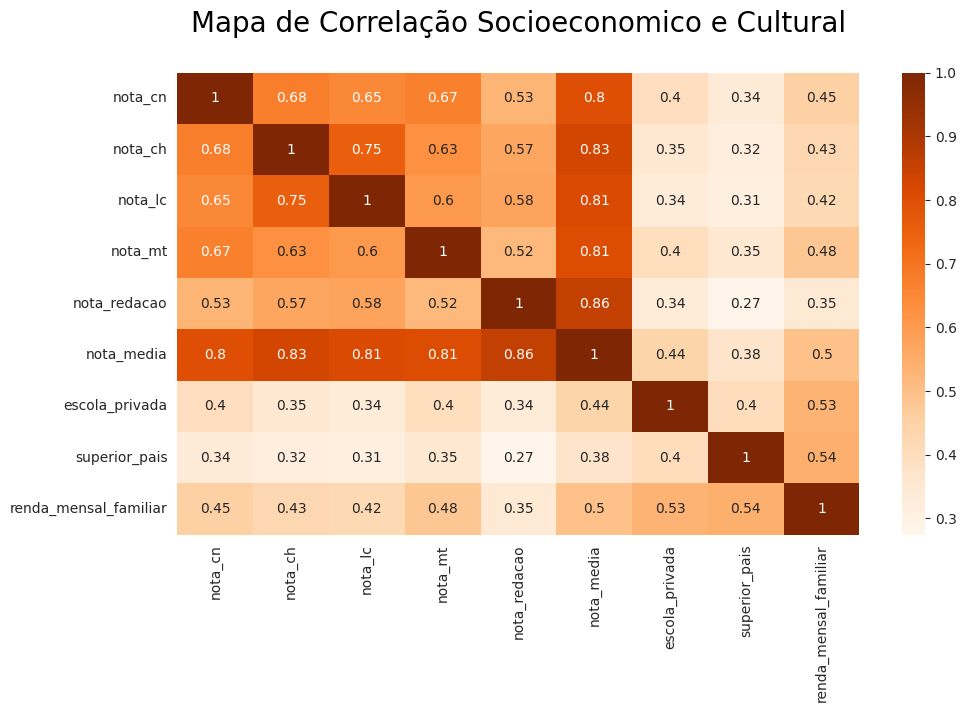

In [ ]:
corr3 = df_escolaridade.loc[:, colunas_notas +  ['escola_privada'] + ['superior_pais'] + ['renda_mensal_familiar']]
corr3 = corr3.corr()

plt.figure(figsize = (11,6))
sns.heatmap(corr3, annot = True, cmap = "Oranges")
plt.title("Mapa de Correlação Socioeconomico e Cultural\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

## Conclusão

Os dados do ENEM revelam um cenário preocupante de desigualdade socioeconômica e racial, onde a maioria dos candidatos vem de famílias de baixa renda, mais da metade se identifica como PPI (Preto, Pardo ou Indígena). Esses padrões contrastam com o perfil dos estudantes das universidades públicas, onde há uma predominância de alunos de alta renda.

Essa disparidade sugere um fenômeno de "seleção socioeconômica" nas instituições de ensino superior, onde o acesso é limitado para grupos desfavorecidos. Além disso, é importante observar que fatores como estudar em escola privada, ter pais com nível superior de educação e pertencer a famílias com maior renda, são claramente associados a um melhor desempenho no ENEM. Esses insights destacam a complexidade das desigualdades educacionais no Brasil e a necessidade de políticas que promovam a inclusão e a equidade no acesso à educação superior.

